## 머신러닝
# 선형 서포트벡터 머신 (Linear SVM)

- 선형 SVM 은 클래스를 구분하는 분류 문제에서, 각 클래스를 잘 구분하는 직선을 그어주는 방식이다.
- 아래의 그림들을 보면 선형 SVM 이 직관적이라는 것을 알 수 있다. 두 클래스의 가운데 선을 그어주게 된다. 가장 가까이 있는 점들과의 거리가 가장 큰 직선을 찾는다.
- 이때 가장 가까이 있는 점들을 **Support Vector** 라고 하고, 찾은 직선과 서포트벡터 사이의 거리를 **최대 마진(margin)** 이라 한다.
- 결국 마진을 최대로 하는 서포트벡터와 직선을 찾는 것이 목표이다.
- 선형이 아닌 일반적인 SVM 에 대해서는 별도로 다룬다.
- 참고 자료 : https://en.wikipedia.org/wiki/Support_vector_machine

<img src="ch02_07.jpg">
<p style="text-align: center;">(출처 : https://en.wikipedia.org/wiki/Support_vector_machine)</p>
<img src="ch02_08.png">
<p style="text-align: center;">(출처 : http://scikit-learn.org/stable/modules/svm.html)</p>

### 속성 2개, 클래스 2개인 경우
- 아래에서, Iris 데이터에 선형 SVM 을 적용해 보겠다.
- 선형 SVM 은 직선(또는 평면)으로 클래스를 구분한다.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris

iris = load_iris()

In [7]:
from sklearn.model_selection import train_test_split

col1 = 0
col2 = 1

X = iris.data[:,[col1,col2]] # 시각화를 위해 속성 2개만 선정 (petal length & petal width)
# y = iris.target
y = iris.target.copy()
y[y==2] = 1 # 타겟값을 setosa(0), others(1) 로 설정

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 2), (38, 2), (112,), (38,))

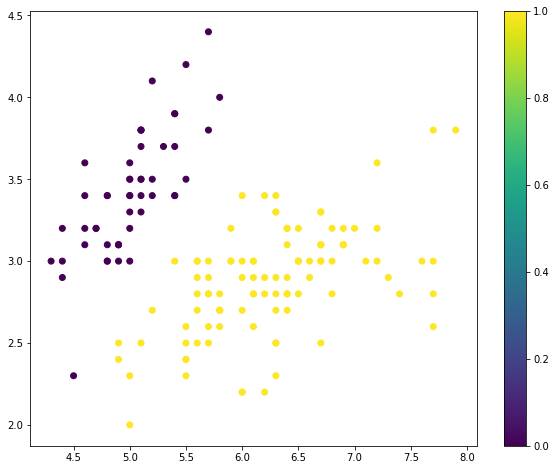

In [8]:
plt.figure(figsize=[10,8])
plt.scatter(X[:,0], X[:,1], c=y)
plt.colorbar()

In [9]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train, y_train)

score = model.score(X_train, y_train)
print(score)

0.9910714285714286


In [10]:
score = model.score(X_test, y_test)
print(score)

1.0


- 선형 SVM 도 직선을 찾는 것이므로 기울기(가중치)와 절편 값을 결과로 알려준다.

In [11]:
display(model.coef_, model.intercept_)

array([[ 1.42621397, -2.16843918]])

array([-0.99519383])

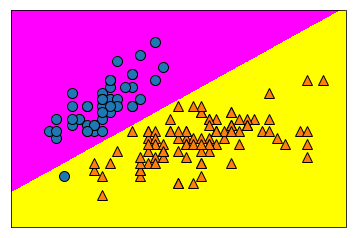

In [12]:
import mglearn

mglearn.plots.plot_2d_classification(model, X_train, eps=0.5, cm='spring')
mglearn.discrete_scatter(X[:,0], X[:,1], y)

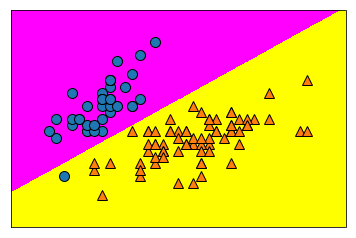

In [13]:
mglearn.plots.plot_2d_classification(model, X_train, eps=0.5, cm='spring')
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

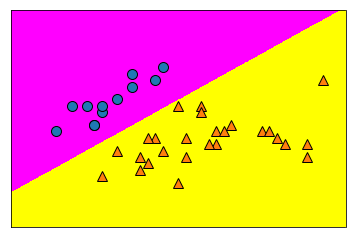

In [14]:
mglearn.plots.plot_2d_classification(model, X_train, eps=0.5, cm='spring')
mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test)

Text(0.5,1,'Linear SVC - Iris')

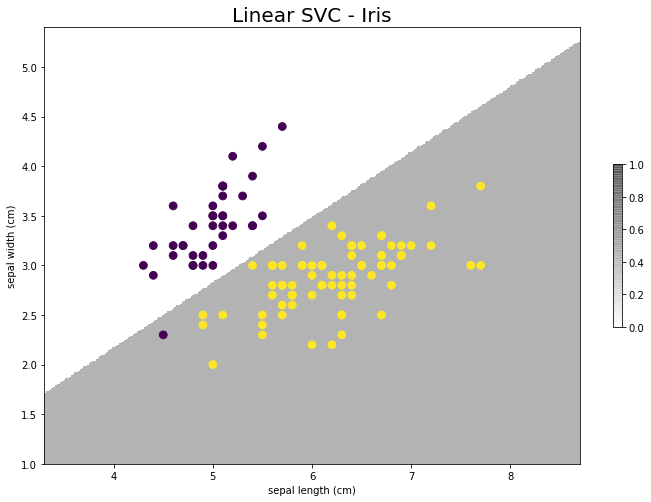

In [15]:
scale = 300
xmax = X_train[:,0].max()+1
xmin = X_train[:,0].min()-1
ymax = X_train[:,1].max()+1
ymin = X_train[:,1].min()-1

xx = np.linspace(xmin,xmax,scale)
yy = np.linspace(ymin,ymax,scale)
data1, data2 = np.meshgrid(xx,yy)
X_grid = np.c_[data1.ravel(), data2.ravel()]
pred_y = model.predict(X_grid)

fig=plt.figure(figsize=[12,10])

CS = plt.imshow(pred_y.reshape(scale,scale), interpolation=None, origin='lower',
                extent=[xmin,xmax,ymin,ymax], alpha=0.3, cmap='gray_r')

# draw X_train
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=60)

plt.xlabel(iris.feature_names[col1])
plt.ylabel(iris.feature_names[col2])
plt.colorbar(CS, shrink=0.3)
plt.title('Linear SVC - Iris',fontsize=20)

In [16]:
w = model.coef_
b = model.intercept_

display(w, b)

array([[ 1.42621397, -2.16843918]])

array([-0.99519383])

### 로지스틱회귀와 비교

In [40]:
svc = LinearSVC(C=1)
svc.fit(X_train, y_train)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [41]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1)
lr.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Text(0.5,1,'LogisticRegression')

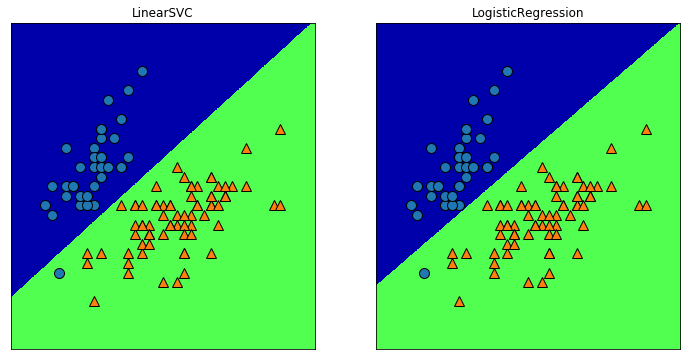

In [42]:
plt.figure(figsize=[12,6])

plt.subplot(1,2,1)
mglearn.plots.plot_2d_classification(svc, X_train, eps=0.5)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.title('LinearSVC')

plt.subplot(1,2,2)
mglearn.plots.plot_2d_classification(lr, X_train, eps=0.5)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.title('LogisticRegression')

In [43]:
svc.coef_, svc.intercept_

(array([[ 1.42621756, -2.16843863]]), array([-0.99519551]))

In [45]:
svc.coef_[0,0]/svc.coef_[0,1]

-0.657716356990741

In [44]:
lr.coef_, lr.intercept_

(array([[ 2.26457291, -3.63150412]]), array([-0.75642052]))

In [46]:
lr.coef_[0,0]/lr.coef_[0,1]

-0.6235908963768472

### 결과 평가

- 선형 SVM 은 평면으로 클래스를 구분하므로 기울기와 편향값을 제공한다.
- 하지만 확률수치를 알 수 있는 model.predict_proba() 는 제공하지 않지만, decision_function() 을 제공한다.
- LinearSVC 는 C 라는 중요한 옵션을 가진다. C 값이 클수록 모델이 훈련데이터에 과대적합 되는 경향이 생긴다.

In [7]:
help(LinearSVC)

Help on class LinearSVC in module sklearn.svm.classes:

class LinearSVC(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.linear_model.base.SparseCoefMixin)
 |  LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)
 |  
 |  Linear Support Vector Classification.
 |  
 |  Similar to SVC with parameter kernel='linear', but implemented in terms of
 |  liblinear rather than libsvm, so it has more flexibility in the choice of
 |  penalties and loss functions and should scale better to large numbers of
 |  samples.
 |  
 |  This class supports both dense and sparse input and the multiclass support
 |  is handled according to a one-vs-the-rest scheme.
 |  
 |  Read more in the :ref:`User Guide <svm_classification>`.
 |  
 |  Parameters
 |  ----------
 |  penalty : string, 'l1' or 'l2' (default='l2')
 |      Specifie

- 테스트 데이터에 적용해 보자.

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LinearSVC(C=1)
model.fit(X_train, y_train)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [60]:
model.score(X_test, y_test)

0.9736842105263158

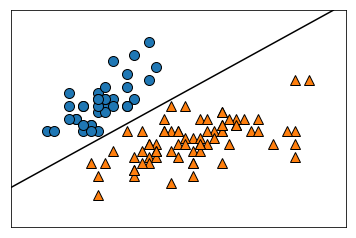

In [61]:
mglearn.plots.plot_2d_separator(model, X_train, eps=0.5)
#mglearn.plots.plot_2d_classification(model, X_train, eps=0.5)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

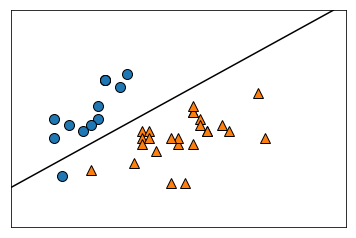

In [62]:
mglearn.plots.plot_2d_separator(model, X_train, eps=0.5)
#mglearn.plots.plot_2d_classification(model, X_train, eps=0.5)
mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test)

In [64]:
pred_y = model.predict(X_test)

display(y_test, pred_y)

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1])

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1])

In [65]:
X_test[y_test!=pred_y]

array([[4.5, 2.3]])

In [67]:
y_test[y_test!=pred_y]

array([0])

In [68]:
pred_y[y_test!=pred_y]

array([1])

In [69]:
np.where(y_test!=pred_y)

(array([26], dtype=int64),)

In [70]:
X_test[26]

array([4.5, 2.3])

In [8]:
help(model.decision_function)

Help on method decision_function in module sklearn.linear_model.base:

decision_function(X) method of sklearn.svm.classes.LinearSVC instance
    Predict confidence scores for samples.
    
    The confidence score for a sample is the signed distance of that
    sample to the hyperplane.
    
    Parameters
    ----------
    X : {array-like, sparse matrix}, shape = (n_samples, n_features)
        Samples.
    
    Returns
    -------
    array, shape=(n_samples,) if n_classes == 2 else (n_samples, n_classes)
        Confidence scores per (sample, class) combination. In the binary
        case, confidence score for self.classes_[1] where >0 means this
        class would be predicted.



In [16]:
model.classes_

array([0, 1])

In [72]:
y_test

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1])

In [71]:
model.decision_function(X_test)

array([-1.97231103,  1.73013428, -1.09070588,  1.53034329, -0.57795247,
       -1.97231103,  0.87647379, -1.60345929, -1.97231103,  1.50239863,
        2.9540393 ,  0.87647379,  3.21250519, -0.74840601,  0.56211857,
       -1.77252004,  0.78985422,  0.64873813,  2.01515204,  2.27222514,
        1.55828795, -1.20387731,  1.24671832,  1.01758988,  1.47445397,
        1.8446985 ,  0.58867044,  3.23905706, -1.45955762, -0.66317924,
        1.8446985 ,  1.35988975, -0.92025234,  0.93097031,  1.47584676,
        0.70462745,  1.90198061,  0.93236311])

In [73]:
model.decision_function(X_test)[26]

0.5886704430449565

In [74]:
np.abs(model.decision_function(X_test)).mean()

1.44860927075669

In [18]:
model.predict(X_test)

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1])

### 모든 속성과 모든 품종 사용

In [88]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LinearSVC(C=1)
model.fit(X_train, y_train)

score1 = model.score(X_train, y_train)
score2 = model.score(X_test, y_test)
print(score1, score2)

0.9732142857142857 0.9473684210526315


In [89]:
model.coef_

array([[ 0.1853895 ,  0.43357449, -0.79177264, -0.47375839],
       [-0.04124514, -0.67805675,  0.45279612, -0.92213714],
       [-0.87204016, -1.13377931,  1.3280332 ,  1.9313118 ]])

In [90]:
model.intercept_

array([ 0.11764149,  1.32793848, -1.00618651])

In [91]:
pred_y = model.predict(X_test)
pred_y

array([2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 2, 2, 1, 1, 2, 0, 2, 2, 2, 0, 1,
       1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1])

In [92]:
y_test

array([2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 2, 2, 0, 1,
       1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 2])

In [93]:
np.where(y_test!=pred_y)

(array([ 8, 37], dtype=int64),)

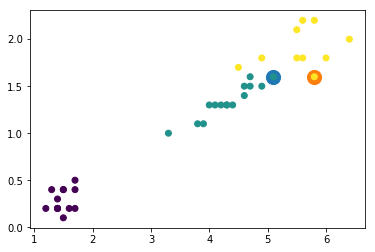

In [95]:
plt.scatter(X_test[8,2], X_test[8,3], s=200)
plt.scatter(X_test[37,2], X_test[37,3], s=200)

plt.scatter(X_test[:,2], X_test[:,3], c=y_test)

In [96]:
model.decision_function(X_test)

array([[-2.76351669, -0.08187829,  0.53159102],
       [ 1.13509616, -0.38915819, -6.60871816],
       [ 1.70492708, -1.58026922, -8.20086985],
       [ 1.40222378, -0.8698044 , -7.20248397],
       [-1.49608585, -0.14590095, -1.47954737],
       [ 1.8823197 , -1.26458244, -8.61923447],
       [ 1.59087751, -1.31942652, -7.63797479],
       [ 1.15213289, -0.61485227, -6.92613421],
       [-2.39542428,  0.08355518,  0.56343663],
       [ 1.75506322, -1.29726103, -8.31877164],
       [-1.01997929,  0.07059113, -1.68643225],
       [-2.67062858, -0.43280808,  1.02253989],
       [-2.78506008, -0.52089292,  0.15837097],
       [-2.22079196,  0.20844748,  0.06984262],
       [-1.5617565 ,  0.01835451, -0.8140175 ],
       [-2.58411792, -0.1437934 ,  0.7047584 ],
       [ 1.33002944, -0.89833696, -6.98317888],
       [-2.74373053, -0.02245908,  1.12534768],
       [-2.27620458, -0.20380501,  0.4224803 ],
       [-3.01115306, -0.37680942,  1.87569308],
       [ 1.29019123, -1.08088241, -6.884

### 두 속성과 모든 품종 사용

In [60]:
col1 = 1
col2 = 3

X = iris.data[:,[col1,col2]] # 시각화를 위해 속성 2개만 선정 (sepal width & petal width)
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LinearSVC(C=100)
model.fit(X_train, y_train)

score_train = model.score(X_train, y_train)
score_test = model.score(X_test, y_test)
print(score_train, score_test)

0.9821428571428571 0.8947368421052632


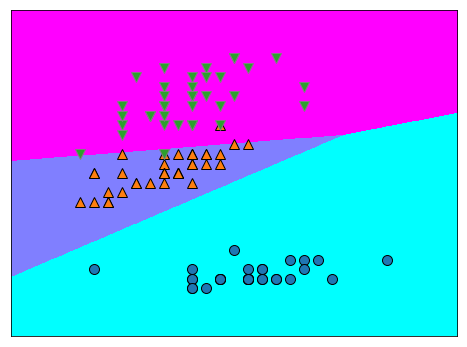

In [61]:
plt.figure(figsize=[8,6])
mglearn.plots.plot_2d_classification(model, X_train, eps=0.5, cm='cool')
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

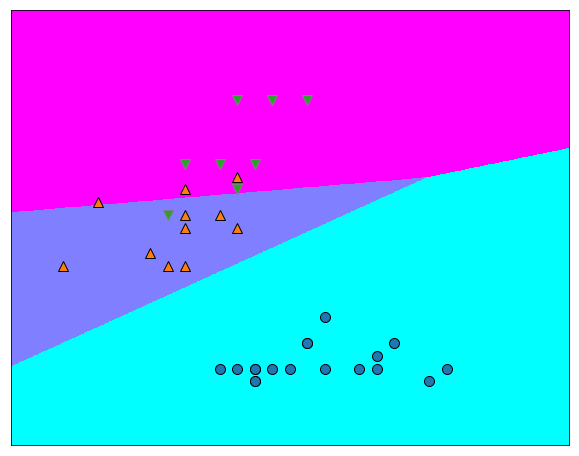

In [62]:
plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X_train, eps=0.5, cm='cool')
mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test)

### C 값 변경

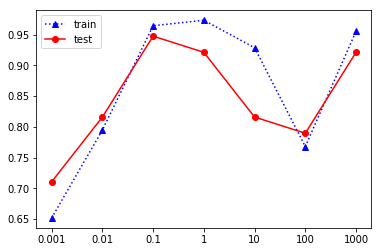

In [102]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

score1 = []
score2 = []
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

for C in Cs:
    model = LinearSVC(C=C)
    model.fit(X_train, y_train)
    s1 = model.score(X_train, y_train)
    s2 = model.score(X_test, y_test)
    score1.append(s1)
    score2.append(s2)
    
plt.plot(score1, 'b^:')
plt.plot(score2, 'ro-')
plt.legend(['train','test'])
plt.xticks(range(len(Cs)), Cs)
pass

### 비용함수
- hard-margin 과 soft-margin 설명 (https://en.wikipedia.org/wiki/Support_vector_machine)

In [103]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model.logistic:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.linear_model.base.SparseCoefMixin)
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the cross-
 |  entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag' and 'lbfgs' solvers. It can handle
 |  both dense and sparse input. Use C-ordered arrays or CSR matrices
 |  containing 64-bit floats for optimal performance; any other input format
 |  will be converted (and copied).
 |  
 |  The 'newton-cg', 'sag', and 'lbfgs' solve